# **Import libraries and Connecting to the Database**

In [20]:
import matplotlib.pyplot as plt 
import pandas as pd
import pyodbc
import seaborn as sns
import scipy.stats as stats

**Connect to the sql server database**

In [21]:
server = 'DESKTOP-T4M784R\SQLEXPRESS' 
database = 'fifa' 
username = 'sa' 
password = 'Dj0nat2n'  

In [22]:
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [23]:
query = """ SELECT
      pl.short_name
      ,info.[age]
       ,info.[player_positions]
       ,league.[league_name]
       ,league.[league_level]
      ,info.[year]
      ,info.[overall]
      ,info.[potential]
      ,info.[value_eur]
      ,info.[wage_eur]
      ,info.[club_team_id]
      ,info.[club_position]
      ,info.[club_joined]
      ,info.[weak_foot]
      ,info.[skill_moves]
      ,info.[international_reputation]
      ,info.[work_rate]
      ,info.[body_type]
      ,info.[player_tags]
      ,info.[player_traits]
      ,info.[pace]
      ,info.[shooting]
      ,info.[passing]
      ,info.[dribbling]
      ,info.[defending]
      ,info.[physic]
      ,info.[attacking_crossing]
      ,info.[attacking_finishing]
      ,info.[attacking_heading_accuracy]
      ,info.[attacking_short_passing]
      ,info.[attacking_volleys]
      ,info.[skill_dribbling]
      ,info.[skill_curve]
      ,info.[skill_fk_accuracy]
      ,info.[skill_long_passing]
      ,info.[skill_ball_control]
      ,info.[movement_acceleration]
      ,info.[movement_sprint_speed]
      ,info.[movement_agility]
      ,info.[movement_reactions]
      ,info.[movement_balance]
      ,info.[power_shot_power]
      ,info.[power_jumping]
      ,info.[power_stamina]
      ,info.[power_strength]
      ,info.[power_long_shots]
      ,info.[mentality_aggression]
      ,info.[mentality_interceptions]
      ,info.[mentality_positioning]
      ,info.[mentality_vision]
      ,info.[mentality_penalties]
      ,info.[mentality_composure]
      ,info.[defending_marking_awareness]
      ,info.[defending_standing_tackle]
      ,info.[defending_sliding_tackle]
      ,info.[goalkeeping_diving]
      ,info.[goalkeeping_handling]
      ,info.[goalkeeping_kicking]
      ,info.[goalkeeping_positioning]
      ,info.[goalkeeping_reflexes]
      ,info.[goalkeeping_speed]
      ,info.[ls]
      ,info.[st]
      ,info.[rs]
      ,info.[lw]
      ,info.[lf]
      ,info.[cf]
      ,info.[rf]
      ,info.[rw]
      ,info.[lam]
      ,info.[cam]
      ,info.[ram]
      ,info.[lm]
      ,info.[lcm]
      ,info.[cm]
      ,info.[rcm]
      ,info.[rm]
      ,info.[lwb]
      ,info.[ldm]
      ,info.[cdm]
      ,info.[rdm]
      ,info.[rwb]
      ,info.[lb]
      ,info.[lcb]
      ,info.[cb]
      ,info.[rcb]
      ,info.[rb]
      ,info.[gk]
  FROM [fifa].[dbo].[player_info_stats]  info
  left join [fifa].[dbo].[player] pl 
  on pl.sofifa_id = info.sofifa_id
  left join [fifa].[dbo].[club] club
  on club.club_team_id = info.club_team_id
  left join [fifa].[dbo].[league] league
  on club.league_id = league.league_id
 """

**Get Data from Database into Dataframe**

In [24]:
df = pd.read_sql(query, cnxn)

# Take a Quick Look at the Data Structure


Shape function shows that we have  142101 rows and 88 columns in our dataset

In [25]:
df.shape

(142101, 88)

Let's take a look at the columns

In [26]:
df.columns

Index(['short_name', 'age', 'player_positions', 'league_name', 'league_level',
       'year', 'overall', 'potential', 'value_eur', 'wage_eur', 'club_team_id',
       'club_position', 'club_joined', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'player_tags',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',

Lets take a look at what it is our data

In [27]:
df.head(2)

,short_name,age,player_positions,league_name,league_level,year,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,34,"RW, ST, CF",French Ligue 1,1.0,2022,93,93,78000000.0,320000.0,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,32,ST,German 1. Bundesliga,1.0,2022,92,92,119500000.0,270000.0,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3


We can see by the **info** function below  and the **head** function above that we have a lot of **numeric values** describing the characteristics of the player but the ones regarding the player position overall (lm,cam, rwb etc) comes with the overall + the increase or decrease of that player overall in that position and it is interpreted as an object by pandas

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142101 entries, 0 to 142100
Data columns (total 88 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   short_name                   142101 non-null  object 
 1   age                          142101 non-null  int64  
 2   player_positions             142101 non-null  object 
 3   league_name                  138838 non-null  object 
 4   league_level                 138838 non-null  float64
 5   year                         142101 non-null  int64  
 6   overall                      142101 non-null  int64  
 7   potential                    142101 non-null  int64  
 8   value_eur                    140204 non-null  float64
 9   wage_eur                     140479 non-null  float64
 10  club_team_id                 140471 non-null  float64
 11  club_position                140471 non-null  object 
 12  club_joined                  132166 non-null  object 
 13 

With the **describe** function we can see some statistical insights about our dataset (only regarding the numerical values)

In [29]:
df.describe()

,age,league_level,year,overall,potential,value_eur,wage_eur,club_team_id,weak_foot,skill_moves,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,142101.000000,138838.000000,142101.000000,142101.000000,142101.000000,1.402040e+05,140479.000000,140471.000000,142101.000000,142101.000000,...,110323.000000,142101.000000,142101.000000,142101.000000,142101.000000,142101.000000,142101.000000,142101.000000,142101.000000,15797.000000
mean,25.117754,1.384751,2018.644443,65.709735,70.729312,2.277650e+06,11152.385054,44479.225413,2.939958,2.325705,...,57.792410,45.664710,47.607195,45.648982,16.545070,16.291617,16.151188,16.300089,16.656477,39.537317
std,4.659323,0.751792,2.277220,7.070117,6.275820,5.827028e+06,22503.973741,53279.779410,0.661581,0.749189,...,12.379719,20.457152,21.353212,20.964145,17.684634,16.834106,16.458745,16.996863,17.990736,10.437957
min,16.000000,1.000000,2015.000000,40.000000,40.000000,1.000000e+03,500.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,21.000000,1.000000,2017.000000,61.000000,66.000000,3.000000e+05,2000.000000,449.000000,3.000000,2.000000,...,50.000000,25.000000,26.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,32.000000
50%,25.000000,1.000000,2019.000000,66.000000,70.000000,7.000000e+05,4000.000000,1887.000000,3.000000,2.000000,...,59.000000,50.000000,54.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,41.000000
75%,28.000000,2.000000,2021.000000,70.000000,75.000000,1.800000e+06,10000.000000,110799.000000,3.000000,3.000000,...,66.000000,63.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,47.000000
max,54.000000,4.000000,2022.000000,94.000000,95.000000,1.940000e+08,575000.000000,115820.000000,5.000000,5.000000,...,96.000000,94.000000,94.000000,95.000000,91.000000,92.000000,95.000000,92.000000,94.000000,68.000000


We can already learn something about our data:

- The **mean** age of the players is around 25 years old and we have a **standard deviation** of about 4.6 years
- the **overall** values vary from 40(min) to 94(max)
- the **potential** values vary from 40(min) to 95(max)
    

**hist()** method will plot a histogram for each numerical attribute

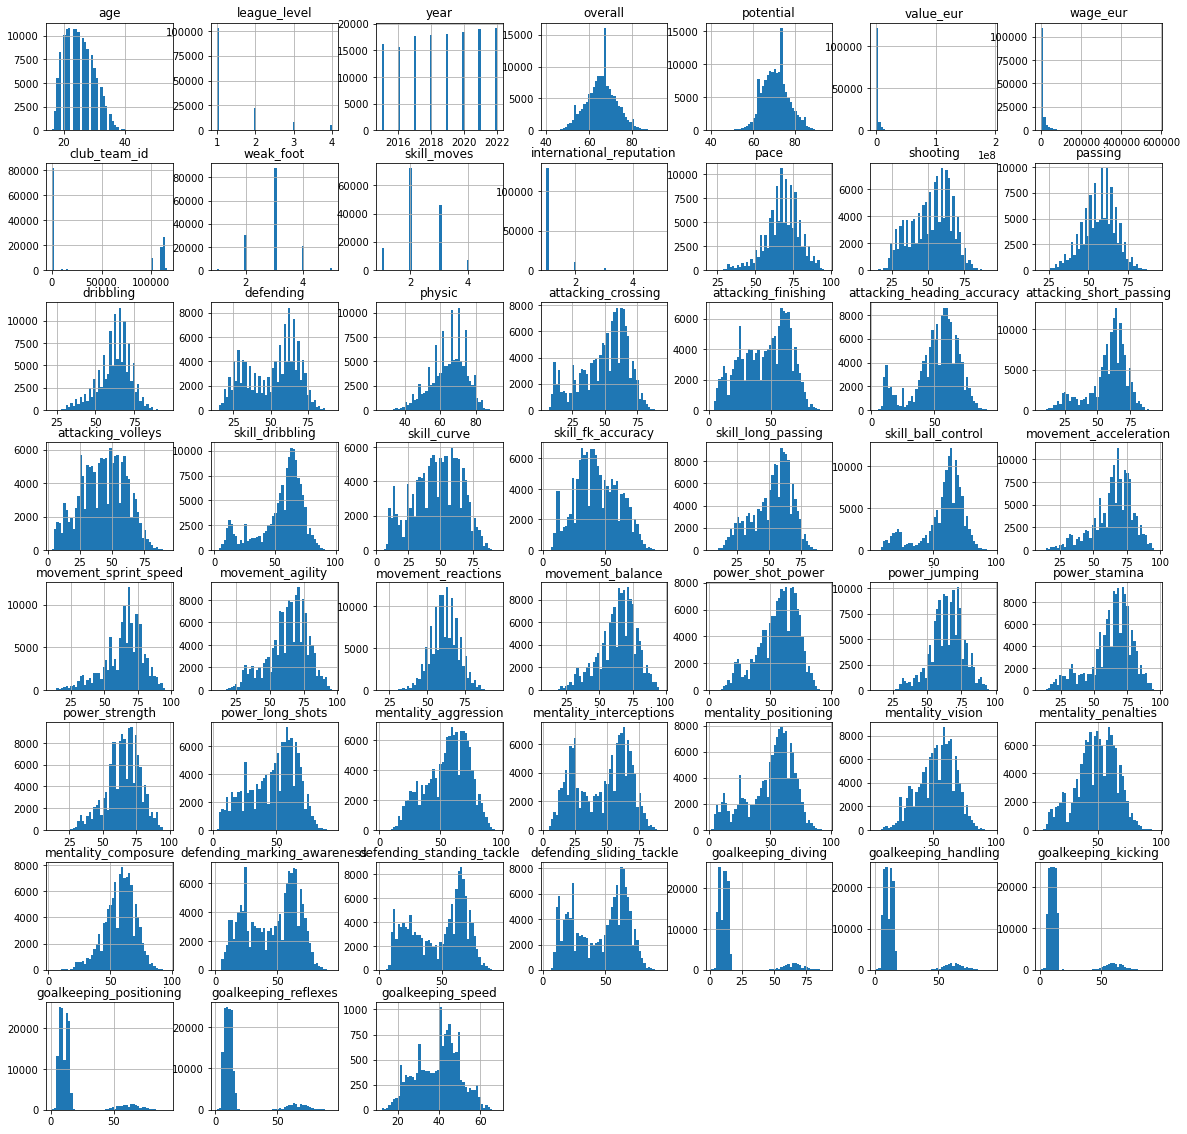

In [30]:
df.hist(bins=50,figsize=(20,20))
plt.show()


We can also take a look in the **position** values for the players

In [31]:
df['player_positions'].unique()

array(['RW, ST, CF', 'ST', 'ST, LW', ..., 'CM, CDM, LW, CAM',
       'CAM, CDM, CF', 'LB, CB, LM, LW'], dtype=object)

see that one player can play in different positions in the game, see the example below from messi:

in 2022 he can play as a Right Wing(RW) a StriKer(ST) or Even a Center Foward(CF)

In [32]:
df.loc[df['short_name']== 'L. Messi']

,short_name,age,player_positions,league_name,league_level,year,overall,potential,value_eur,wage_eur,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,34,"RW, ST, CF",French Ligue 1,1.0,2022,93,93,78000000.0,320000.0,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
19239,L. Messi,33,"RW, ST, CF",Spain Primera Division,1.0,2021,93,93,103500000.0,560000.0,...,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,19+3
38183,L. Messi,32,"RW, CF, ST",Spain Primera Division,1.0,2020,94,94,95500000.0,560000.0,...,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6,19+6
38192,L. Messi,32,"RW, CF, ST",Spain Primera Division,1.0,2020,94,94,95500000.0,560000.0,...,66+6,66+6,66+6,68+6,63+6,53+6,53+6,53+6,63+6,19+6
56689,L. Messi,31,"CF, RW, ST",Spain Primera Division,1.0,2019,94,94,110500000.0,575000.0,...,61+7,61+7,61+7,63+7,59+7,48+7,48+7,48+7,59+7,19+7
74774,L. Messi,30,RW,Spain Primera Division,1.0,2018,93,93,105000000.0,575000.0,...,59+4,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4,19+4
92728,L. Messi,29,RW,Spain Primera Division,1.0,2017,93,93,89000000.0,575000.0,...,59+4,59+4,59+4,62+4,57+4,45+4,45+4,45+4,57+4,19+4
110323,L. Messi,28,"RW, CF",Spain Primera Division,1.0,2016,94,95,111000000.0,550000.0,...,57+3,57+3,57+3,62+3,57+3,44+3,44+3,44+3,57+3,19+3
125946,L. Messi,27,CF,Spain Primera Division,1.0,2015,93,95,100500000.0,550000.0,...,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3


# Data Cleaning and Preparation

## Treating Positions null values

From the **info** function that we apply we saw that in the position overall columns only the columns **'rw'** and **'lw'** have null values 

in this analysis we will replace this null values with the **overall rating** of the player

In [33]:
df['rw'] = df['rw'].fillna(df['overall'].apply(str))
df['lw'] = df['lw'].fillna(df['overall'].apply(str))

Veryfying that we don't have null values anymore

In [34]:
print (f"lw null values = {df['lw'].isnull().sum()}")
print (f"rw null values = {df['rw'].isnull().sum()}")

lw null values = 0
rw null values = 0


## Treating wages and value null values

From the info function that we apply we saw that in the wage_eur and value_eur we have some missing information

For this analysis we are choosing to **remove** this rows from the dataset

In [35]:
df = df[df['wage_eur'].notna()]
df = df[df['value_eur'].notna()]

In [36]:
print (f"wage_eur null values = {df['wage_eur'].isnull().sum()}")
print (f"value_eur null values = {df['value_eur'].isnull().sum()}")

wage_eur null values = 0
value_eur null values = 0


## **Transforming the position overall data into numeric values**

We are going to transform the position overall values that are as an equation (overall + or - something) to only the overall of the player in that position, creating the function solve_position_equation and applying to each position collumn , this will remove the operation signs and convert the values to integers

In [37]:
df_pos_columns = [ 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'gk']


In [38]:
def solve_position_equation(s):
      plus_position = s.find('+')
      minus_position = s.find('-')

      if plus_position == -1 and minus_position == -1:
            convert =  int(s)
            return convert
      else:
            if plus_position != -1:
                  convert = int(s[0:plus_position])
                  return convert
            if minus_position != -1:
                  convert = int(s[0:minus_position])
                  return convert


In [39]:
for i,val in enumerate(df_pos_columns):
    df[val] = df[val].apply(solve_position_equation)

Veryfying if the data of positions is now as integer

In [40]:
df[df_pos_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140204 entries, 0 to 142100
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   ls      140204 non-null  int64
 1   st      140204 non-null  int64
 2   rs      140204 non-null  int64
 3   lw      140204 non-null  int64
 4   lf      140204 non-null  int64
 5   cf      140204 non-null  int64
 6   rf      140204 non-null  int64
 7   rw      140204 non-null  int64
 8   lam     140204 non-null  int64
 9   cam     140204 non-null  int64
 10  ram     140204 non-null  int64
 11  lm      140204 non-null  int64
 12  lcm     140204 non-null  int64
 13  cm      140204 non-null  int64
 14  rcm     140204 non-null  int64
 15  rm      140204 non-null  int64
 16  lwb     140204 non-null  int64
 17  ldm     140204 non-null  int64
 18  cdm     140204 non-null  int64
 19  rdm     140204 non-null  int64
 20  rwb     140204 non-null  int64
 21  lb      140204 non-null  int64
 22  lcb     140204 non-n

# **Data Analysis**

## **Most Paid Players by Year**

Creating a unique dataframe for each  year and getting the max values for each year , then concatenating all the dataframes and plotting the barchart

In [41]:
fifa_15 = df.loc[df['year']==2015]
fifa_16 = df.loc[df['year']==2016]
fifa_17 = df.loc[df['year']==2017]
fifa_18 = df.loc[df['year']==2018]
fifa_19 = df.loc[df['year']==2019]
fifa_20 = df.loc[df['year']==2020]
fifa_21 = df.loc[df['year']==2021]
fifa_22 = df.loc[df['year']==2022]

fifa_15 = fifa_15[fifa_15['wage_eur']==fifa_15['wage_eur'].max()]
fifa_16 = fifa_16[fifa_16['wage_eur']==fifa_16['wage_eur'].max()]
fifa_17 = fifa_17[fifa_17['wage_eur']==fifa_17['wage_eur'].max()]
fifa_18 = fifa_18[fifa_18['wage_eur']==fifa_18['wage_eur'].max()]
fifa_19 = fifa_19[fifa_19['wage_eur']==fifa_19['wage_eur'].max()]
fifa_20 = fifa_20[fifa_20['wage_eur']==fifa_20['wage_eur'].max()]
fifa_21 = fifa_21[fifa_21['wage_eur']==fifa_21['wage_eur'].max()]
fifa_22 = fifa_22[fifa_22['wage_eur']==fifa_22['wage_eur'].max()]

fifa_15 = fifa_15[['short_name','year','wage_eur','value_eur']]
fifa_16 = fifa_16[['short_name','year','wage_eur','value_eur']]
fifa_17 = fifa_17[['short_name','year','wage_eur','value_eur']]
fifa_18 = fifa_18[['short_name','year','wage_eur','value_eur']]
fifa_19 = fifa_19[['short_name','year','wage_eur','value_eur']]
fifa_20 = fifa_20[['short_name','year','wage_eur','value_eur']]
fifa_21 = fifa_21[['short_name','year','wage_eur','value_eur']]
fifa_22 = fifa_22[['short_name','year','wage_eur','value_eur']]

fifa_wage_data = [fifa_15, fifa_16, fifa_17, fifa_18, fifa_19,fifa_20,fifa_21,fifa_22]

fifa_wage_year = pd.concat(fifa_wage_data)
fifa_wage_year =fifa_wage_year.reset_index()

Seeing as a table

In [42]:
fifa_wage_year

,index,short_name,year,wage_eur,value_eur
0,125946,L. Messi,2015,550000.0,100500000.0
1,110323,L. Messi,2016,550000.0,111000000.0
2,92727,Cristiano Ronaldo,2017,575000.0,87000000.0
3,92728,L. Messi,2017,575000.0,89000000.0
4,74773,Cristiano Ronaldo,2018,575000.0,95500000.0
5,74774,L. Messi,2018,575000.0,105000000.0
6,56689,L. Messi,2019,575000.0,110500000.0
7,38183,L. Messi,2020,560000.0,95500000.0
8,38192,L. Messi,2020,560000.0,95500000.0
9,19239,L. Messi,2021,560000.0,103500000.0


We can see here that untill 2021 **L.Messi** (tied with C. Ronaldo in 2017 and 2018) have been the most paid player in the game, that change in 2022 with L.Messi transfer to PSG. leaving **Benzema** and **de Bruyne** with the highest wages in the game

<AxesSubplot:xlabel='year', ylabel='wage_eur'>

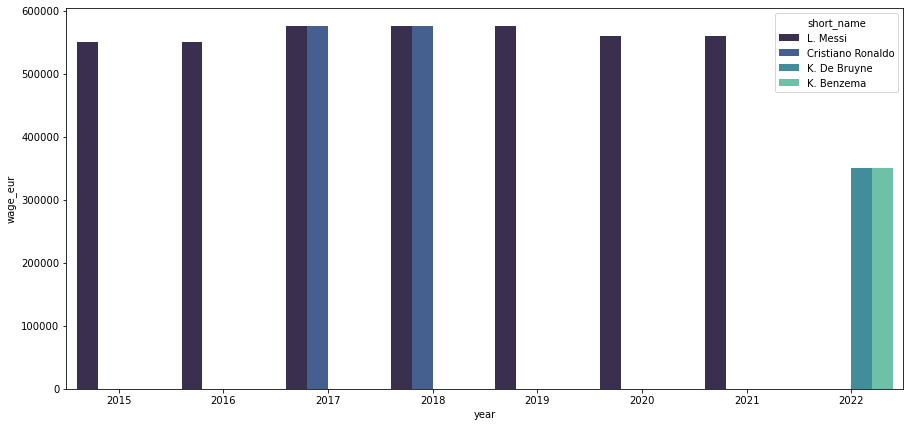

In [43]:
plt.figure(figsize=(15,7))
sns.barplot(x='year',y='wage_eur',hue='short_name', data=fifa_wage_year,palette ="mako")

## **Wage vs Value Relation**

The Pearson product-moment correlation coefficient (PPMCC), the bivariate correlation,or colloquially simply as the correlation coefficient― is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables.

In [44]:
stats.pearsonr(df['value_eur'], df['wage_eur'])

(0.7854100027373181, 0.0)

Looking at the Pearson Correlation and as expected we can see that **value of a player is directed correlated with it's wage**

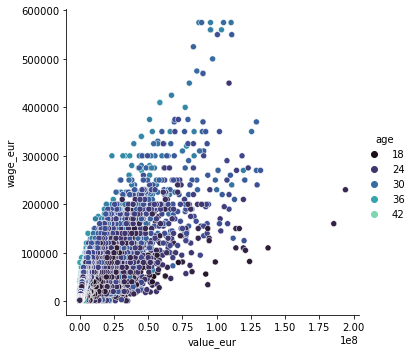

In [45]:
sns.relplot(x='value_eur',y='wage_eur', palette = 'mako',data=df, hue = df.age)

## **Histogram of Wages in Fifa**

Here I'm plotting only the wages greater than 50k to better visualtiation  but the behavior is similar with the whole dataset. to sum up we have  very few players earning more than  50k  and most of the players (77% aproximately) earn between 0 and 10k

<AxesSubplot:xlabel='wage_eur', ylabel='Count'>

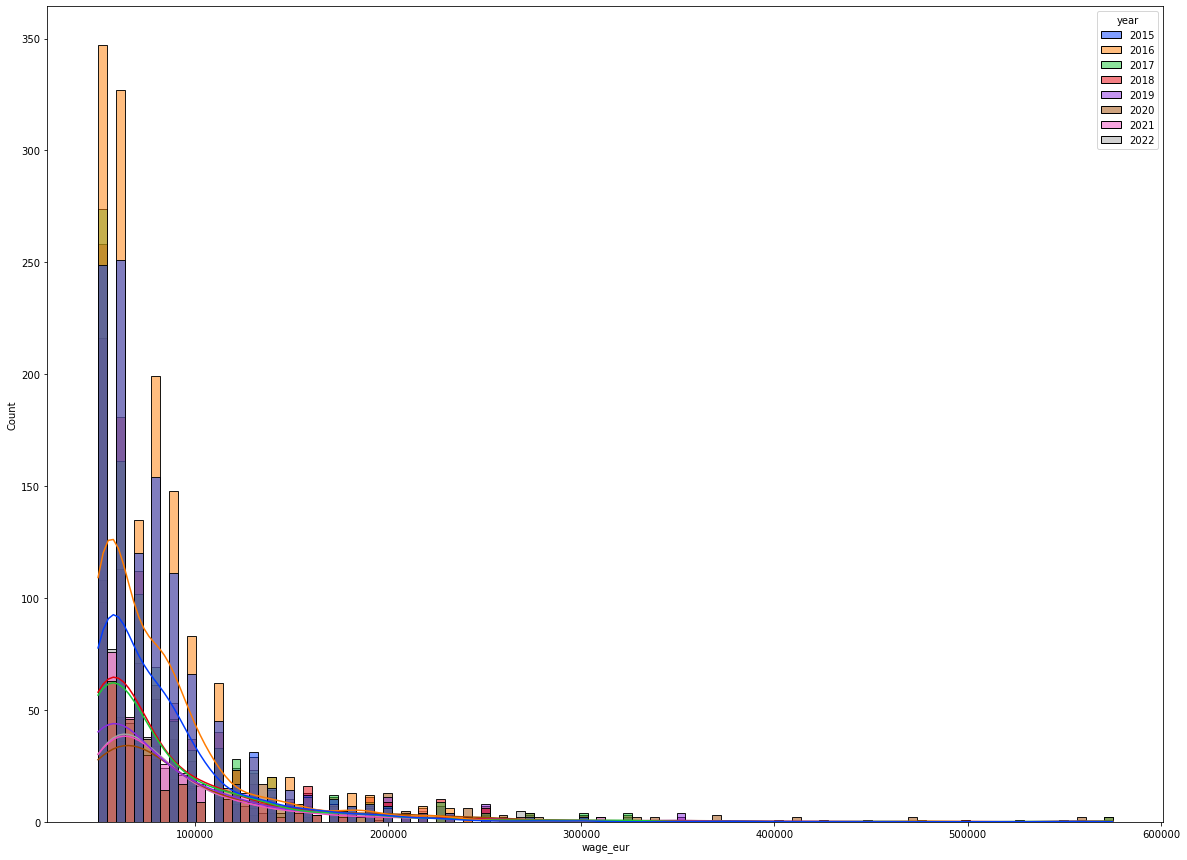

In [46]:
plt.figure(figsize=(20,15))
sns.histplot(data = df.loc[df['wage_eur']>=50000], x= 'wage_eur',kde = True, hue='year', palette = 'bright' )

## Range of Wages

**77.4%** of players a have wage between 0 and 10k

In [47]:
# 0 - 10k
df['wage_eur'].loc[(df['wage_eur']>0)&(df['wage_eur']<=10000)].count()/df['wage_eur'].count()*100


77.42575104847222

**18.7%** of players have a wage between 10k and 50k

In [48]:
# 10 - 50k
df['wage_eur'].loc[(df['wage_eur']>10000)&(df['wage_eur']<=50000)].count()/df['wage_eur'].count()*100


18.666371858149553

Only **3.9%** of players have a wage greater than 50k

In [49]:
## >50k
df['wage_eur'].loc[df['wage_eur']>50000].count()/df['wage_eur'].count()*100

3.9078770933782203

## Looking for Correlations - Corr_Matrix - Wages


Let’s look on how much each of our attributes correlate with the wages of the players

In [50]:
corr_matrix = df.corr()
corr_matrix["wage_eur"].sort_values(ascending=False)

wage_eur                    1.000000
value_eur                   0.785410
international_reputation    0.689486
overall                     0.611765
movement_reactions          0.534837
                              ...   
goalkeeping_reflexes       -0.019407
goalkeeping_kicking        -0.021078
year                       -0.084029
league_level               -0.132497
club_team_id               -0.204001
Name: wage_eur, Length: 79, dtype: float64

**Strong Positive Correlation (>= 0.75)**

- The wage_eur value tends to go up when the **value_eur** goes up

In [51]:
corr_matrix["wage_eur"].loc[corr_matrix["wage_eur"]>= 0.75].sort_values(ascending=False)

wage_eur     1.00000
value_eur    0.78541
Name: wage_eur, dtype: float64

**Moderate Positive Correlation(>= 0.6 and <=0.75)**


We can see a moderate positive correlation with the following attributes

- international_reputation
- overall

In [52]:
corr_matrix["wage_eur"].loc[(corr_matrix["wage_eur"]>= 0.6)&(corr_matrix["wage_eur"]< 0.75)].sort_values(ascending=False)

international_reputation    0.689486
overall                     0.611765
Name: wage_eur, dtype: float64

**Weakly Negative Correlation (<0)**

wage_eur tends to go down when the **league_level** go down

In [53]:
corr_matrix["wage_eur"].loc[corr_matrix["wage_eur"]< 0].sort_values(ascending=True)

club_team_id              -0.204001
league_level              -0.132497
year                      -0.084029
goalkeeping_kicking       -0.021078
goalkeeping_reflexes      -0.019407
goalkeeping_diving        -0.019149
goalkeeping_handling      -0.018883
goalkeeping_positioning   -0.017592
Name: wage_eur, dtype: float64

## Looking for Correlations - Scatter Matrix

Let’s just focus on a few **promising attributes**  here I am disconsidering the value because it is conected with the wage but not in an explanatory way

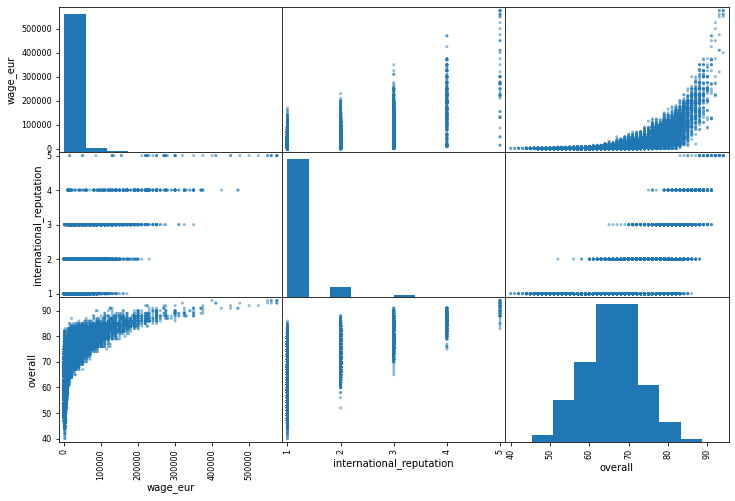

In [54]:
from pandas.plotting import scatter_matrix
attributes = ['wage_eur','international_reputation','overall']
scatter_matrix(df[attributes], figsize=(12, 8))

plt.show()


it seems that the better of all of the attributes to describe wage is
- overall